In [1]:
!python --version

Python 3.11.4


### *Create some data*

Write out the Y model

In [53]:
import numpy as np

# creating a random dataset
np.random.seed(21022024)

n = 500

X = np.random.uniform(0, 2, size = (n, 3))

epsilon = np.random.normal(0, 1, size=n)

# from the exercise
# Y = X1**3 - 3.5*X1**2 + 3*X1 + epsilon

# but we need to reference X appropriately
# first element is indexed by 0, so [:, 0] = X1

def f(feature_matrix):
    return feature_matrix[:,0]**3 - 3.5*feature_matrix[:,0]**2 + 3*feature_matrix[:,0]

Y = f(X) + epsilon

### *Begin Linear Regression*

Import LinearRegression from sklearn

Once you have the LinearRegression() object, you need to fit it to X and Y

In [54]:
from sklearn.linear_model import LinearRegression

# b) estimate models
model1 = LinearRegression().fit(X[:,0].reshape(-1,1), Y)

In [55]:
# c) computer the estimate ~ predict
x_value = np.array([[0.1, 0, 0]]) # the two brackets show that it should be a matrix of 2 rows


model1.predict(x_value[:, 0].reshape(1, -1))

array([0.68978631])

In [56]:
f(x_value)

array([0.266])

In [33]:
np.shape(X)

(500, 3)

In [31]:
np.shape(epsilon)

(500,)

Run Monte Carlo

In [87]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(21022024)

n = 500
R = 5
x_value = np.array([[0.1, 0, 0]]) # the two brackets show that it should be a matrix of 2 rows
def f(feature_matrix):
    return feature_matrix[:,0]**3 - 3.5*feature_matrix[:,0]**2 + 3*feature_matrix[:,0]

    # LOOP
results = []
for _ in range(R):
    # For R Times, repeat: 
    # a. data generation
    X = np.random.uniform(0, 2, size = (n, 3))
    epsilon = np.random.normal(0, 1, size=n)
    Y = f(X) + epsilon
    
    # b. estimate model
    
    #model 1
    model1 = LinearRegression().fit(X[:,0].reshape(-1,1), Y)
    
    #model 2
    poly2 = PolynomialFeatures(3) # third degree polynomial
    X_poly2 = poly2.fit_transform(X[:, 0].reshape(-1,1))
    model2 = LinearRegression().fit(X_poly2, Y)


    # model 3 (giving them all the features)
    poly3 = PolynomialFeatures(3) # third degree polynomial
    X_poly3 = poly3.fit_transform(X)
    model3 = LinearRegression().fit(X_poly3, Y)
    
    # c. predict the model for x_value
    pred1 = model1.predict(x_value[:, 0].reshape(1, -1))
    pred2 = model2.predict(poly2.transform(x_value[:,0].reshape(-1,1)))
    pred3 = model3.predict(poly3.transform(x_value))
    
    # store predictions
    results.append([pred1, pred2, pred3])

In [88]:
np.shape(results)

(5, 3, 1)

In [89]:
results[0] # here you can see now it is 2 array elements

[array([0.68978631]), array([0.43950299]), array([0.00459712])]

In [90]:
results_array = np.array(results) # this is cool, but hard to differenciate between pred1 and pred2
results_array

array([[[ 0.68978631],
        [ 0.43950299],
        [ 0.00459712]],

       [[ 0.87216654],
        [ 0.25373275],
        [ 0.16656408]],

       [[ 0.72822135],
        [ 0.32940448],
        [ 0.54944946]],

       [[ 0.76367027],
        [ 0.23774149],
        [ 0.43267868]],

       [[ 0.82306226],
        [ 0.1731394 ],
        [-0.29548637]]])

In [91]:
np.mean(results_array, axis=0) 
# first results is for the first model, and second is for the second model
# the axis = 0 does this

array([[0.77538135],
       [0.28670422],
       [0.17156059]])

Now, we need to calculate the bias. This is the difference between the predicted values and the actual values. We will use the mean of the results_array as the predicted. 

f(x_value) is the actual.

In [93]:
import pandas as pd

#bias = np.mean(results_array) - f(x_value)
#variance = np.var(results_array)
#mse = np.mean((results_array - f(x_value))**2 # mean squared error
#mse_check = bias**2 + variance


# put everything in a pandas df
# Calculate bias, variance, and mse outside the DataFrame creation for clarity
bias = (np.mean(results_array, axis = 0) - f(x_value)).flatten()
variance = (np.var(results_array, axis = 0)).flatten()
mse = (np.mean((results_array - f(x_value))**2, axis = 0)).flatten()  # Corrected missing parenthesis here

# Put everything in a pandas DataFrame
df = pd.DataFrame({
    'model': ('Model 1', 'Model 2', 'Model 3'),  # Ensure the values are in a list for consistent DataFrame structure
    'bias': bias,
    'variance': variance,
    'mse': mse  # Use the previously calculated mse
})

# Calculate mse_check and add it as a new column to the DataFrame
df['mse_check'] = df['bias']**2 + df['variance']  # Ensure to use DataFrame's variance column

# Print or return the DataFrame
df

,model,bias,variance,mse,mse_check
0,Model 1,0.509381,0.004266,0.263735,0.263735
1,Model 2,0.020704,0.008310,0.008739,0.008739
2,Model 3,-0.094439,0.091403,0.100322,0.100322


The `bias` should be 0. As we estimate more parameters, the variance will increase, and the bias should decrease. 

The third model is overfit. The first model is underfit. Is what we are seeing here is Model 2 is a good match, as it has a bias close to 0, a good variance, and mse. 

Underfit models have high bias and low variance. Overfit has low bias, high variance. 

# ChatGPT Restructured Code

## 1. Setup and Function Definition

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


np.random.seed(20240228)  # Ensure reproducibility

# Define the true function
def f(feature_matrix):
    return feature_matrix[:,0]**3 - 3.5*feature_matrix[:,0]**2 + 3*feature_matrix[:,0]


## 2. Data Generation Parameters

In [17]:
n = 1000  # Number of samples
R = 5  # Number of repetitions
x_value = np.array([[0.1, 0, 0]])  # Evaluation point


## 3. Model Training and Prediction Loop

In [5]:
results = []  # Initialize list to store results

for _ in range(R):
    # a. Generate data
    X = np.random.uniform(0, 2, size=(n, 3))
    X = np.column_stack((X1, X2, X3))
    epsilon = np.random.normal(0, 1, size=n)
    Y = f(X) + epsilon
    
    # Train-test Split
    X_train, Xtest, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5) # could also be 500

    # b. Fit models
    # Model 1: Linear Regression
    model1 = LinearRegression().fit(X[:, 0].reshape(-1, 1), Y)
    
    # Model 2: Polynomial Regression (3rd degree) with one feature
    poly2 = PolynomialFeatures(3)
    X_poly2 = poly2.fit_transform(X[:, 0].reshape(-1, 1))
    model2 = LinearRegression().fit(X_poly2, Y)
    
    # Model 3: Polynomial Regression (3rd degree) with all features
    poly3 = PolynomialFeatures(3)
    X_poly3 = poly3.fit_transform(X)
    model3 = LinearRegression().fit(X_poly3, Y)
    
    # c. Make predictions at x_value
    pred1 = model1.predict(x_value[:, 0].reshape(1, -1))
    pred2 = model2.predict(poly2.transform(x_value[:, 0].reshape(-1, 1)))
    pred3 = model3.predict(poly3.transform(x_value))
    
    # Store predictions
    results.append([pred1, pred2, pred3])


In [34]:
# Task 2 in sample assignment

results = []  # Initialize list to store results

for _ in range(R):
    # a. Generate data
    X1, X2, X3 = [np.random.uniform(0, 1, n) for _ in range (3)]
    X = np.random.uniform(0, 2, size=(n, 3))
    epsilon = np.random.normal(0, 1, size=n)
    Y = f(X) + epsilon
    
    # Train-test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5) # could also be 500

    # b. Fit models
    # Model 1: Linear Regression
    model1 = LinearRegression().fit(X_train[:, 0].reshape(-1, 1), Y_train)
    
    # Model 2: Polynomial Regression (3rd degree) with one feature
    poly2 = PolynomialFeatures(3)
    X_poly2 = poly2.fit_transform(X_train[:, 0].reshape(-1, 1))
    model2 = LinearRegression().fit(X_poly2, Y_train)
    
    # Model 3: Polynomial Regression (3rd degree) with all features
    poly3 = PolynomialFeatures(3)
    X_poly3 = poly3.fit_transform(X_train)
    model3 = LinearRegression().fit(X_poly3, Y_train)
    
    # c. Make predictions at x_value
    pred1 = model1.predict(X_test[:, 0].reshape(-1, 1))
    pred2 = model2.predict(poly2.transform(X_test[:, 0].reshape(-1, 1)))
    pred3 = model3.predict(poly3.transform(X_test))
    
    # Computer MSPE
    MSPE1 = np.mean((pred1-Y_test)**2)
    MSPE2 = np.mean((pred2-Y_test)**2)
    
    # Store predictions
    results.append([pred1, pred2, pred3])

pd.DataFrame({
    "model": ("Model 1", "Model 2", "Model 3"),
    "MSPE": np.mean(([pred1, pred2, pred3]-Y_test)**2, axis=1)

})

,model,MSPE
0,Model 1,1.090389
1,Model 2,1.026480
2,Model 3,1.102363


In [66]:
# Lasso Simulation

from sklearn.linear_model import Lasso

def f(X):
    # f(X) = x1 + x2
    return X[:,0] + X[:,1]

n = 20
R = 1000
x_to_evaluate = np.array([[0, 0]]) # two brackets ensures two dimensional array to avoid having to use the reshape
alphas_to_try = np.arange(0.01, 0.5, 0.02)

# Monte Carlo
results = np.empty((R,len(alphas_to_try)))
for _ in range(R):

    # generate Data
    X1, X2 = [np.random.uniform(0, 1, n) for _ in range (2)]
    X = np.column_stack((X1, X2))
    epsilon = np.random.normal(0,2,n)
    Y = f(X) + epsilon

    # Estimate LASSO
    for id_a, a in enumerate(alphas_to_try): # try with different alhpha
        lasso = Lasso(alpha=a).fit(X, Y)
        pred = lasso.predict(x_to_evaluate)
        results[_, id_a] = pred
    
bias = np.mean(results - f(x_to_evaluate), axis = 0)
variance = np.var(results, axis = 0)
mse = np.mean((results - f(x_to_evaluate))**2, axis = 0)
(bias, variance, mse, results)

(array([0.0921866 , 0.215772  , 0.33568906, 0.44643263, 0.54823831,
        0.63755733, 0.71329033, 0.77652428, 0.82979059, 0.87423606,
        0.90949735, 0.93706244, 0.95892377, 0.97581487, 0.98729653,
        0.99640006, 1.00316563, 1.00783581, 1.0112636 , 1.01336094,
        1.01478082, 1.01567478, 1.01615456, 1.01650853, 1.01683324]),
 array([1.44080317, 1.16794487, 0.96211347, 0.79838709, 0.66684625,
        0.56289904, 0.47810884, 0.41212795, 0.36107582, 0.32220817,
        0.29282458, 0.26921933, 0.25154583, 0.23936407, 0.23113817,
        0.22527389, 0.220919  , 0.21817626, 0.21662985, 0.21574506,
        0.21542387, 0.21519533, 0.21510712, 0.21509448, 0.21516287]),
 array([1.44930153, 1.21450243, 1.07480062, 0.99768918, 0.9674115 ,
        0.96937838, 0.98689194, 1.01511791, 1.04962825, 1.08649685,
        1.12001002, 1.14730535, 1.17108062, 1.19157874, 1.2058926 ,
        1.21808698, 1.22726029, 1.23390928, 1.23928392, 1.24264546,
        1.24520399, 1.24679058, 1.24767721, 

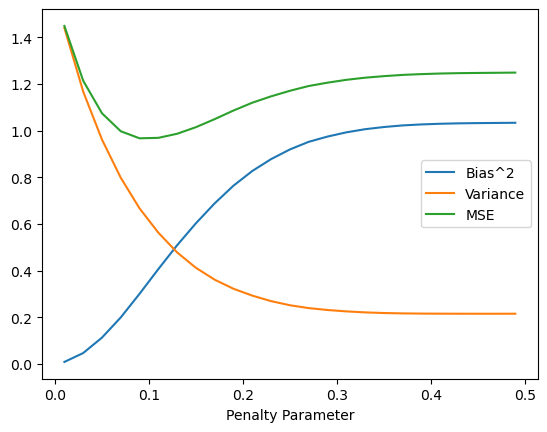

In [70]:
import matplotlib.pyplot as plt
plt.plot(alphas_to_try, bias**2, label="Bias^2")
plt.plot(alphas_to_try, variance, label="Variance")
plt.plot(alphas_to_try, mse, label="MSE")
plt.xlabel("Penalty Parameter")
plt.legend()
plt.show()


## 4. Analysis and DataFrame Creation

In [36]:
# Convert results to a NumPy array for analysis
results_array = np.array(results).squeeze()  # Remove any unnecessary dimensions

# Calculate metrics
bias = np.mean(results_array - Y_test, axis=0)
variance = np.var(results_array, axis=0)
mse = np.mean((results_array - Y_test)**2, axis=0)

# Create DataFrame to summarize results
df = pd.DataFrame({
    'model': ['Model 1', 'Model 2', 'Model 3'],
    'bias': bias,
    'variance': variance,
    'mse': mse
})

# Calculate mse_check (for verification)
df['mse_check'] = df['bias']**2 + df['variance']

df


ValueError: Per-column arrays must each be 1-dimensional

## Notes on Model Evaluation

    Bias: Represents the error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
    Variance: Represents the error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).